In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Activation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#ML4Net - Lab 3

## Team members

Javier González Otero (243078) | Jordi Guillén González (253027) | David Sánchez Maldonado (253798)

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

1. Connect your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [ ]:
#!wget https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl

--2025-05-30 11:24:35--  https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasetLab3.pkl’

datasetLab3.pkl         [ <=>                ] 177.71K  --.-KB/s    in 0.05s   

2025-05-30 11:24:35 (3.45 MB/s) - ‘datasetLab3.pkl’ saved [181974]



3. Define the main path of the code

In [3]:
mypath="/content/drive/Shareddrives/aprendizaje_redes/labs/lab3"

4. Extract the source code to the destination folder

In [ ]:
#mkdir $mypath; cp datasetLab3.pkl $mypath; cd $mypath;

## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [4]:
import pickle
import os
data_path = os.path.join(mypath, 'datasetLab3.pkl')
print(os.getcwd())
print(os.path.exists(data_path))

# Open and load the pickle file
try:
    with open(data_path, 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/content
True
Data loaded successfully:
                     Bytes  Active Connections  Active Users   AP ID
datetime                                                            
2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012
...                    ...                 ...           ...     ...
2019-05-14 07:10:00    0.0            0.000000           0.0   7-104
2019-05-14 07:20:00    0.0            0.000000           0.0   7-104
2019-05-14 07:30:00    0.0            0.000000           0.0   7-104
2019-05-14 07:40:00    0.0            0.000000           0.0   7-104
2019-05-14 07:50:00    0.0            0.034091           0.0   7-104

[211064 rows x 4 columns]


## EXERCISES

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



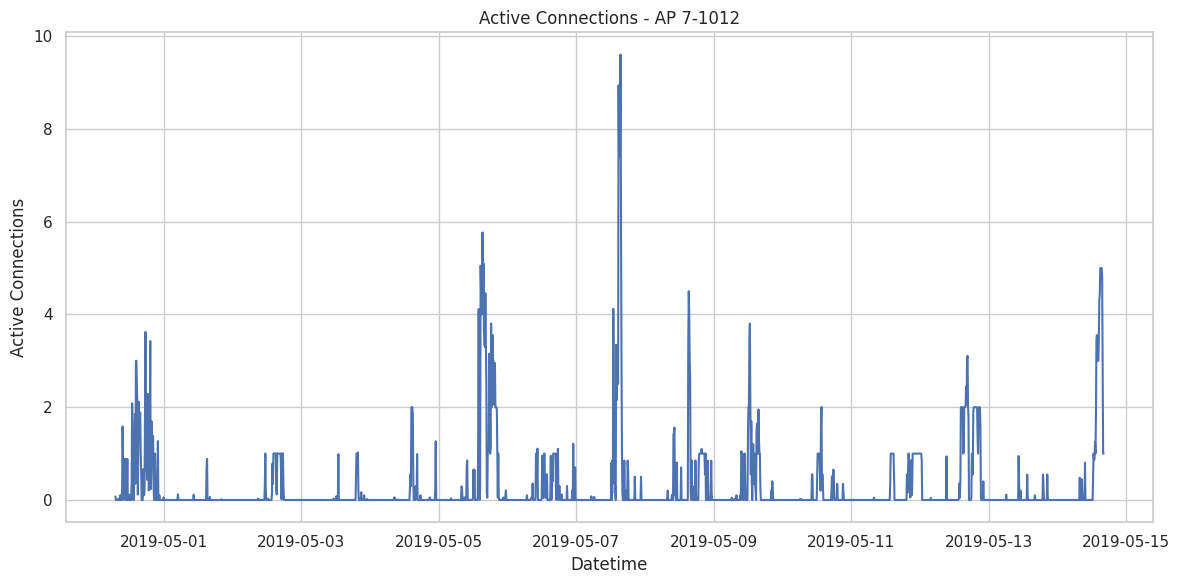

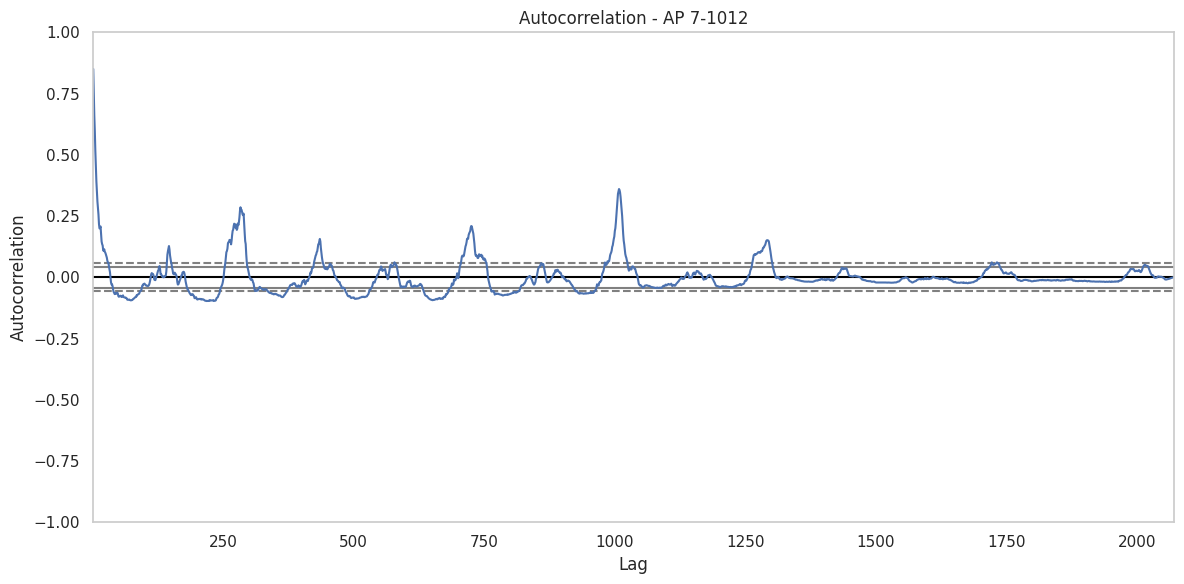


ADF Test - AP 7-1012
ADF Statistic: -6.271489907494064
p-value: 3.9941921205885366e-08
Critical Value (1%): -3.433547028919612
Critical Value (5%): -2.8629522934224085
Critical Value (10%): -2.5675218415927885


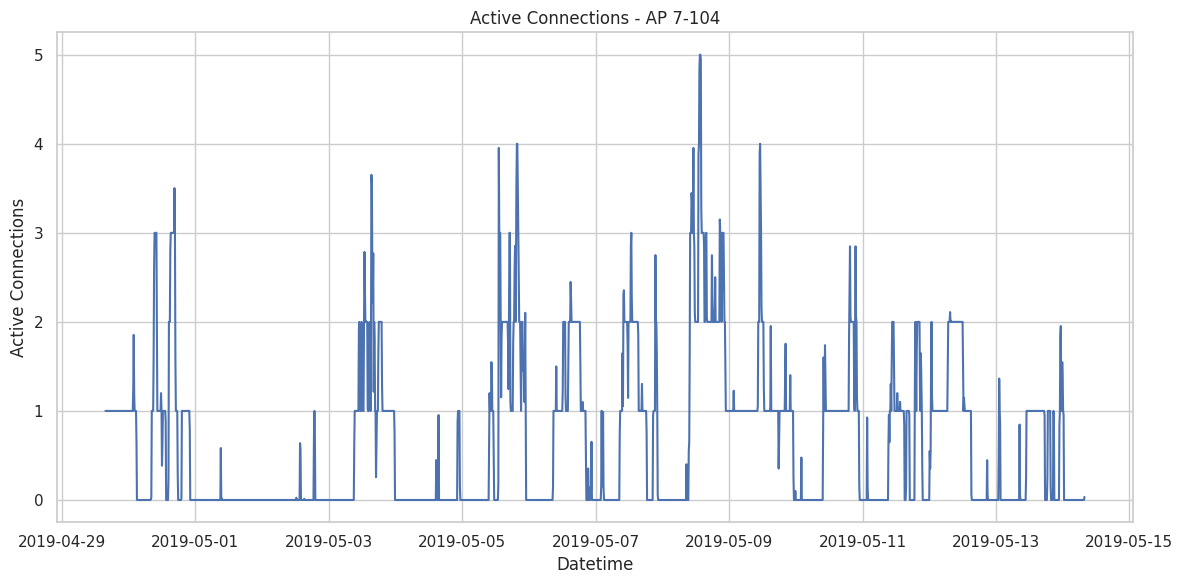

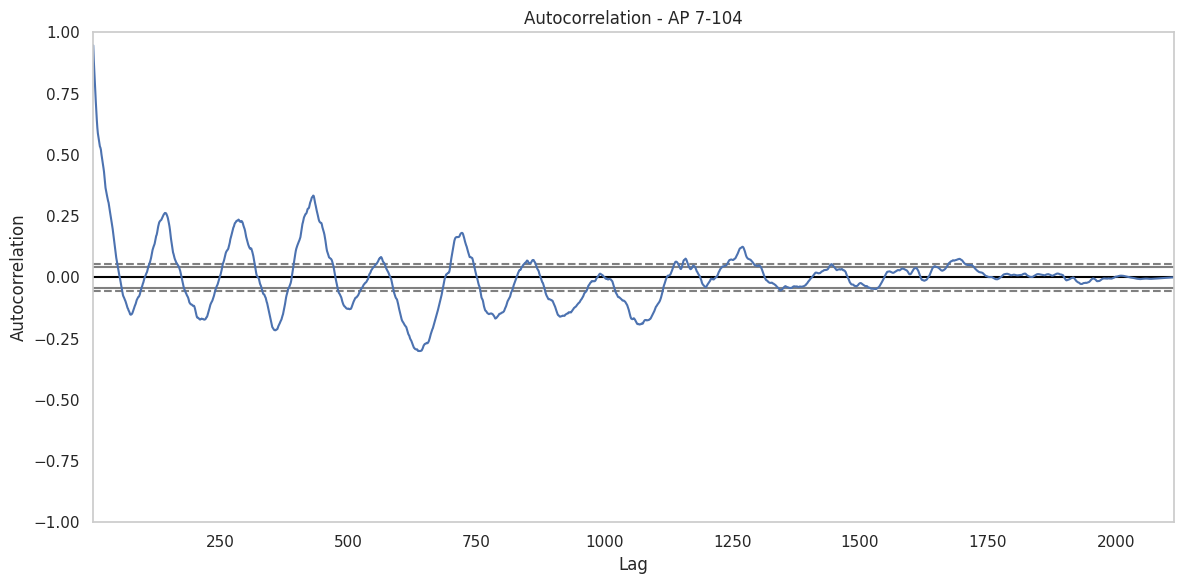


ADF Test - AP 7-104
ADF Statistic: -4.968062729348027
p-value: 2.566029444820909e-05
Critical Value (1%): -3.433485707610957
Critical Value (5%): -2.8629252188514385
Critical Value (10%): -2.5675074259130812


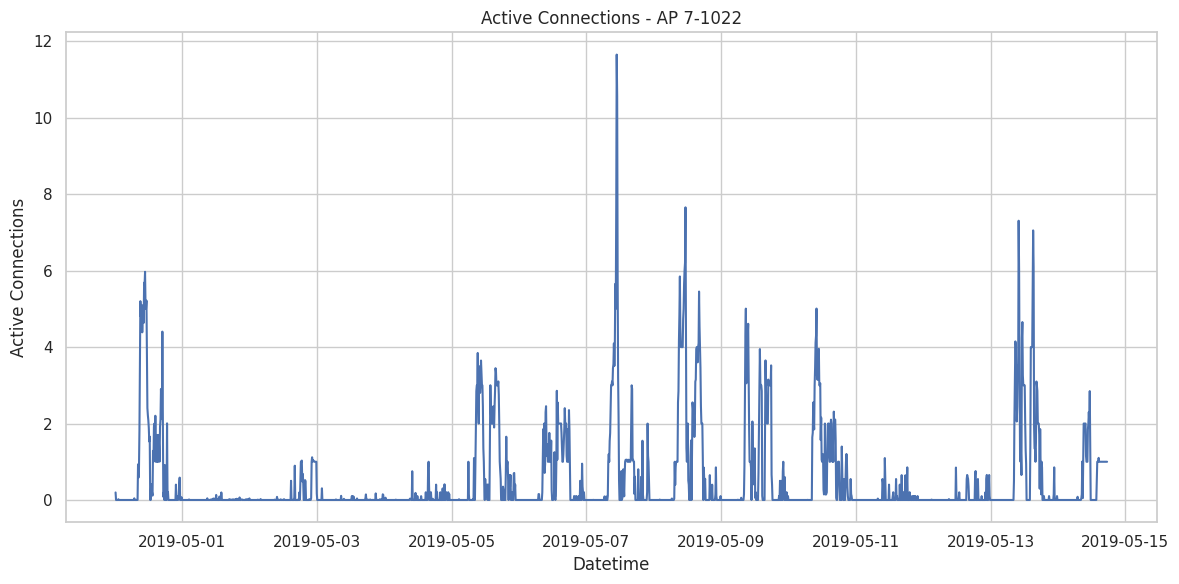

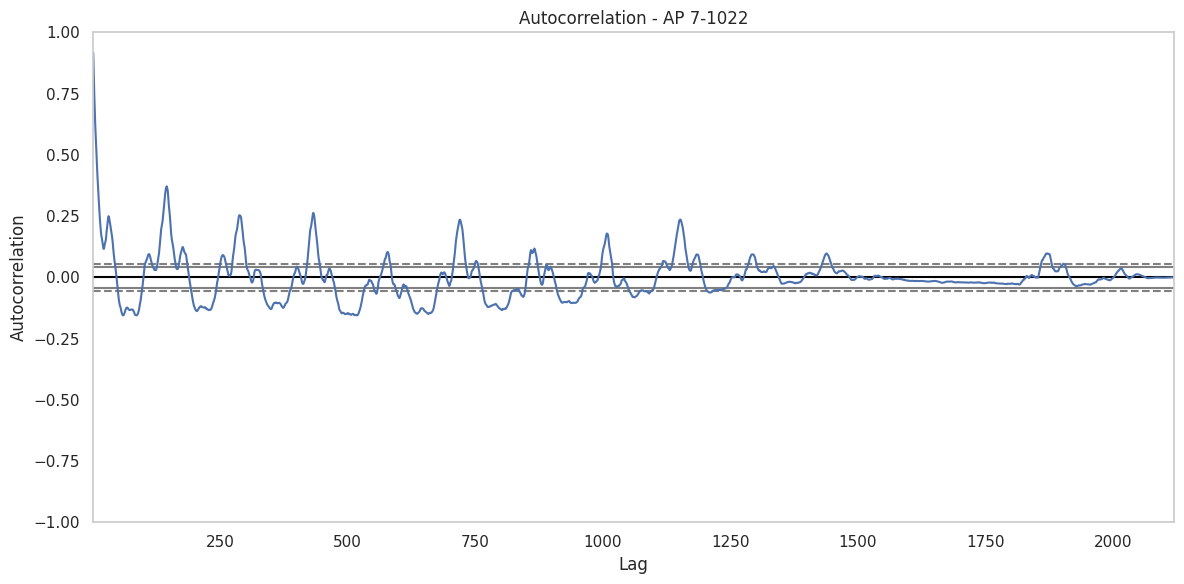


ADF Test - AP 7-1022
ADF Statistic: -5.109292674386849
p-value: 1.3428199922123043e-05
Critical Value (1%): -3.4334782074532204
Critical Value (5%): -2.8629219073453354
Critical Value (10%): -2.5675056627294266


In [5]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Group by AP ID
ap_groups = dict(tuple(loaded_data.groupby('AP ID')))
selected_ap_ids = ['7-1012', '7-104', '7-1022']

for ap_id in selected_ap_ids:
    ap_data = ap_groups[ap_id].copy()
    ap_data = ap_data.sort_index()
    series = ap_data['Active Connections']

    plt.figure()
    plt.plot(series)
    plt.title(f"Active Connections - AP {ap_id}")
    plt.xlabel("Datetime")
    plt.ylabel("Active Connections")
    plt.tight_layout()
    plt.show()

    plt.figure()
    autocorrelation_plot(series)
    plt.title(f"Autocorrelation - AP {ap_id}")
    plt.tight_layout()
    plt.show()

    print(f"\nADF Test - AP {ap_id}")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")


*   AP 7-1012 shows very irregular behavior, with sudden spikes in active connections followed by long periods of little or no activity. There’s no clear repetitive pattern, and the statistical test (ADF) indicates that the data is not stationary, meaning its average behavior changes over time.

*   AP 7-104, on the other hand, has more consistent activity. We can see repeated usage patterns that suggest a daily cycle, and the ADF test confirms that this series is stationary, which means it keeps stable behavior over time. This makes it more predictable and suitable for forecasting.

*   AP 7-1022 combines periods of inactivity with short bursts of high activity. While it looks quite variable at first glance, its autocorrelation plot shows some repetition, and the ADF test also confirms that it is stationary.

### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

In [6]:
def sliding_window_multivariate(data, T_obs, T_pred):
    """
    Generates input/output pairs from multivariate time series using a sliding window.

    Parameters:
        data (np.ndarray): Time series with shape (timesteps, features).
        T_obs (int): Length of observation window.
        T_pred (int): Length of prediction window.

    Returns:
        X (np.ndarray): Observation windows, shape (num_samples, T_obs, num_features)
        y (np.ndarray): Prediction windows, shape (num_samples, T_pred, num_features)
    """
    X, y = [], []
    total_length = len(data)

    for i in range(total_length - T_obs - T_pred + 1):
        x_i = data[i : i + T_obs]
        y_i = data[i + T_obs : i + T_obs + T_pred]
        X.append(x_i)
        y.append(y_i)

    return np.array(X), np.array(y)

In [7]:
# Filter data for a specific AP
ap_104_data = ap_groups['7-104'][['Bytes', 'Active Connections', 'Active Users']]

# Convert to NumPy array
data_array = ap_data.values

# Generate sliding windows
X_104, y_104 = sliding_window_multivariate(data_array, T_obs=10, T_pred=2)

print("Shape X AP 104:", X_104.shape)  # (num_samples, 10, 3)
print("Shape y AP 104:", y_104.shape)  # (num_samples, 2, 3)

Shape X AP 104: (2109, 10, 4)
Shape y AP 104: (2109, 2, 4)


### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [8]:
def split_time_series(X, y, train_ratio=0.7, val_ratio=0.15):
    """
    Splits time series data into train, validation, and test sets chronologically.

    Parameters:
        X (np.ndarray): Input features (num_samples, T_obs, num_features)
        y (np.ndarray): Target labels (num_samples, T_pred, num_features)
        train_ratio (float): Proportion of samples for training.
        val_ratio (float): Proportion of samples for validation.

    Returns:
        X_train, y_train, X_val, y_val, X_test, y_test
    """
    total_samples = len(X)
    train_end = int(total_samples * train_ratio)
    val_end = train_end + int(total_samples * val_ratio)

    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]

    return X_train, y_train, X_val, y_val, X_test, y_test


In [9]:
X_train_104, y_train_104, X_val_104, y_val_104, X_test_104, y_test_104 = split_time_series(X_104, y_104)

print("Train set:", X_train_104.shape, y_train_104.shape)
print("Validation set:", X_val_104.shape, y_val_104.shape)
print("Test set:", X_test_104.shape, y_test_104.shape)

Train set: (1476, 10, 4) (1476, 2, 4)
Validation set: (316, 10, 4) (316, 2, 4)
Test set: (317, 10, 4) (317, 2, 4)


### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

In [10]:
def build_lstm_model(input_shape, output_shape):
    """
    Builds an LSTM model for multivariate time series forecasting.

    Parameters:
        input_shape (tuple): Shape of input (T_obs, num_features).
        output_shape (tuple): Shape of output (T_pred, num_features).

    Returns:
        tf.keras.Model: Compiled LSTM model.
    """
    T_pred, num_features = output_shape

    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(LSTM(64))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(Dense(T_pred * num_features))
    model.add(Activation('sigmoid'))
    model.add(Reshape(output_shape))

    return model

In [11]:
input_shape = (X_train_104.shape[1], X_train_104.shape[2])
output_shape = (y_train_104.shape[1], y_train_104.shape[2])

model_104 = build_lstm_model(input_shape, output_shape)
model_104.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 2, 4)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,208 (200.03 KB)

 Trainable params: 51,208 (200.03 KB)

 Non-trainable params: 0 (0.00 B)

### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

#### Centralized Training

In [12]:
# 1. Select relevant features and subset data
all_aps_data = loaded_data[['Bytes', 'Active Connections', 'Active Users']].copy()
all_aps_data = all_aps_data[0:20000]  # Optional truncation for faster training

# 2. Normalize features
scaler = StandardScaler()
all_aps_scaled = scaler.fit_transform(all_aps_data)

# 3. Create sliding windows
T_obs, T_pred = 10, 2
X_all, y_all = sliding_window_multivariate(all_aps_scaled, T_obs, T_pred)

# 4. Split into train/val/test
X_train_all, y_train_all, X_val_all, y_val_all, X_test_all, y_test_all = split_time_series(X_all, y_all)

print("Train:", X_train_all.shape, y_train_all.shape)
print("Validation:", X_val_all.shape, y_val_all.shape)
print("Test:", X_test_all.shape, y_test_all.shape)

# 5. Build model
input_shape = (T_obs, X_all.shape[2])
output_shape = (T_pred, X_all.shape[2])
lstm_model_centralized = build_lstm_model(input_shape, output_shape)
lstm_model_centralized.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Train model
history_centralized = lstm_model_centralized.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    epochs=40,
    batch_size=64,
    verbose=1
)

# 7. Predict on test set
y_pred_scaled = lstm_model_centralized.predict(X_test_all)

# 8. Inverse scale predictions and ground truth
num_features = X_all.shape[2]
y_test_reshaped = y_test_all.reshape(-1, num_features)
y_pred_reshaped = y_pred_scaled.reshape(-1, num_features)

print("y_test_all_reshaped range:", y_test_reshaped.min(), y_test_reshaped.max())
print("y_pred_reshaped range:", y_pred_reshaped.min(), y_pred_reshaped.max())

# 9. Compute metrics
y_test_flat = y_test_reshaped.flatten()
y_pred_flat = y_pred_reshaped.flatten()

mse = mean_squared_error(y_test_flat, y_pred_flat)
mae = mean_absolute_error(y_test_flat, y_pred_flat)
mape = mean_absolute_percentage_error(y_pred=y_pred_flat,y_true=y_test_flat)

print("\nCentralized Training Results:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

Train: (13992, 10, 3) (13992, 2, 3)
Validation: (2998, 10, 3) (2998, 2, 3)
Test: (2999, 10, 3) (2999, 2, 3)
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.6671 - mae: 0.4795 - val_loss: 2.9450 - val_mae: 0.6733
Epoch 2/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3908 - mae: 0.3247 - val_loss: 2.8686 - val_mae: 0.6461
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4442 - mae: 0.3268 - val_loss: 2.8552 - val_mae: 0.6336
Epoch 4/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3931 - mae: 0.3174 - val_loss: 2.8485 - val_mae: 0.6286
Epoch 5/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3898 - mae: 0.3160 - val_loss: 2.8441 - val_mae: 0.6260
Epoch 6/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3448 - mae: 0.3094 - val_loss: 2.8415 - val_mae: 0.6310
Epoch 7/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3482 - mae: 0.3087 - val_loss: 2.8417 - val_mae: 0.6279
Epoch 8/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3736 - mae: 0.3119 - val_loss: 2.8524 - val_mae: 0.6323
Epoch 9/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.344

#### Federated Training

In [13]:
def get_model_weights(model):
    return model.get_weights()

def set_model_weights(model, weights):
    model.set_weights(weights)

def average_weights(weight_list):
    avg_weights = []
    for weights in zip(*weight_list):
        avg_weights.append(np.mean(weights, axis=0))
    return avg_weights

In [14]:
feature_cols = ['Bytes', 'Active Connections', 'Active Users']
num_clients = 5
num_rounds = 10

In [15]:
data = loaded_data.copy()

# 1. Select a few APs (clients)
client_data = []
selected_ap_ids = []

for ap_id in ap_groups:
    ap_df = ap_groups[ap_id][feature_cols].dropna()
    if len(ap_df) < T_obs + T_pred:
        continue
    scaler = StandardScaler()
    ap_df[feature_cols] = scaler.fit_transform(ap_df[feature_cols])
    X_ap, y_ap = sliding_window_multivariate(ap_df.values, T_obs, T_pred)
    X_train, y_train, _, _, _, _ = split_time_series(X_ap, y_ap)

    client_data.append((X_train, y_train))
    selected_ap_ids.append(ap_id)

    if len(client_data) >= num_clients:
        break

print(f"Using APs: {selected_ap_ids}")

# 2. Initialize global model
input_shape = (T_obs, len(feature_cols))
output_shape = (T_pred, len(feature_cols))
global_model = build_lstm_model(input_shape, output_shape)
global_model.compile(optimizer='adam', loss='mse')

# 3. Simulate Federated Learning
for rnd in range(num_rounds):
    print(f"\nFederated Round {rnd + 1}")
    local_weights = []

    for X_local, y_local in client_data:
        local_model = build_lstm_model(input_shape, output_shape)
        local_model.compile(optimizer='adam', loss='mse')

        set_model_weights(local_model, get_model_weights(global_model))
        local_model.fit(X_local, y_local, epochs=1, batch_size=32, verbose=0)

        local_weights.append(get_model_weights(local_model))

    new_weights = average_weights(local_weights)
    set_model_weights(global_model, new_weights)

# 4. Evaluate global model on all client test data
X_test_all, y_test_all = [], []
for X_local, y_local in client_data:
    _, _, _, _, X_test, y_test = split_time_series(X_local, y_local)
    X_test_all.append(X_test)
    y_test_all.append(y_test)

X_test_all = np.concatenate(X_test_all, axis=0)
y_test_all = np.concatenate(y_test_all, axis=0)

y_pred = global_model.predict(X_test_all)

# 5. Compute evaluation metrics
mse = mean_squared_error(y_test_all.reshape(-1), y_pred.reshape(-1))
mae = mean_absolute_error(y_test_all.reshape(-1), y_pred.reshape(-1))
mape = mean_absolute_percentage_error(y_true=y_test_all.reshape(-1), y_pred=y_pred.reshape(-1))

print("\nFederated Model Results (global evaluation):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


Using APs: ['7-10', '7-100', '7-1002', '7-1003', '7-1004']

Federated Round 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Federated Round 2

Federated Round 3

Federated Round 4

Federated Round 5

Federated Round 6

Federated Round 7

Federated Round 8

Federated Round 9

Federated Round 10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Federated Model Results (global evaluation):
MSE: 1.2343
MAE: 0.5374
MAPE: 4.25%


### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

In [16]:
# (response to exercise 6)